In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasetsandcodefilesstockmarketprediction/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - 390ms/step - loss: 0.0324
Epoch 2/20
35/35 - 8s - 236ms/step - loss: 0.0113
Epoch 3/20
35/35 - 8s - 220ms/step - loss: 0.0104
Epoch 4/20
35/35 - 8s - 229ms/step - loss: 0.0118
Epoch 5/20
35/35 - 10s - 289ms/step - loss: 0.0076
Epoch 6/20
35/35 - 8s - 217ms/step - loss: 0.0075
Epoch 7/20
35/35 - 8s - 234ms/step - loss: 0.0065
Epoch 8/20
35/35 - 8s - 216ms/step - loss: 0.0072
Epoch 9/20
35/35 - 8s - 233ms/step - loss: 0.0056
Epoch 10/20
35/35 - 10s - 292ms/step - loss: 0.0063
Epoch 11/20
35/35 - 12s - 330ms/step - loss: 0.0062
Epoch 12/20
35/35 - 11s - 301ms/step - loss: 0.0227
Epoch 13/20
35/35 - 9s - 246ms/step - loss: 0.0083
Epoch 14/20
35/35 - 10s - 291ms/step - loss: 0.0064
Epoch 15/20
35/35 - 12s - 348ms/step - loss: 0.0056
Epoch 16/20
35/35 - 9s - 258ms/step - loss: 0.0051
Epoch 17/20
35/35 - 9s - 270ms/step - loss: 0.0058
Epoch 18/20
35/35 - 10s - 298ms/step - loss: 0.0056
Epoch 19/20
35/35 - 6s - 171ms/step - loss: 0.0054
Epoch 20/20
35/35 - 10s - 281ms/

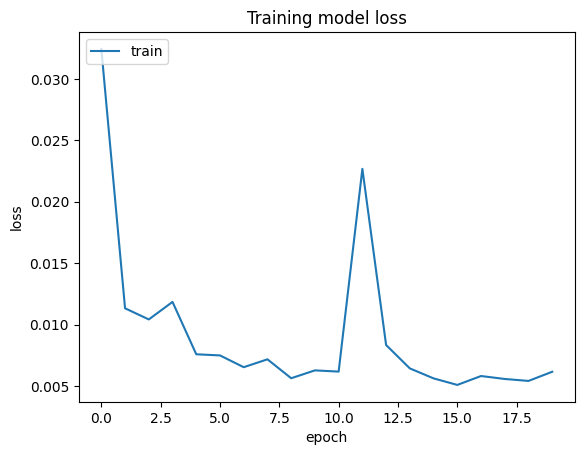

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/drive/MyDrive/datasetsandcodefilesstockmarketprediction/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


array([[1.2352151],
       [1.2404312],
       [1.2531451],
       [1.2715025],
       [1.2880428],
       [1.2927934],
       [1.2837049],
       [1.2662847],
       [1.2509686],
       [1.2424521],
       [1.2333245],
       [1.2218995],
       [1.2116103],
       [1.2023525],
       [1.1993237],
       [1.2029685],
       [1.219338 ],
       [1.2470858],
       [1.2810366],
       [1.3162949],
       [1.3359071],
       [1.338279 ],
       [1.321288 ],
       [1.2913946],
       [1.2598417],
       [1.2368498],
       [1.2260491],
       [1.2226466],
       [1.2177272],
       [1.2106875],
       [1.2020535],
       [1.1910342],
       [1.1733997],
       [1.1499491],
       [1.1364322],
       [1.1401625],
       [1.1582594],
       [1.1833438],
       [1.2098681],
       [1.2272034],
       [1.2419653],
       [1.2567301],
       [1.2725475],
       [1.2874299],
       [1.2981195],
       [1.3004683],
       [1.2920772],
       [1.2819077],
       [1.2761776],
       [1.2784216],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

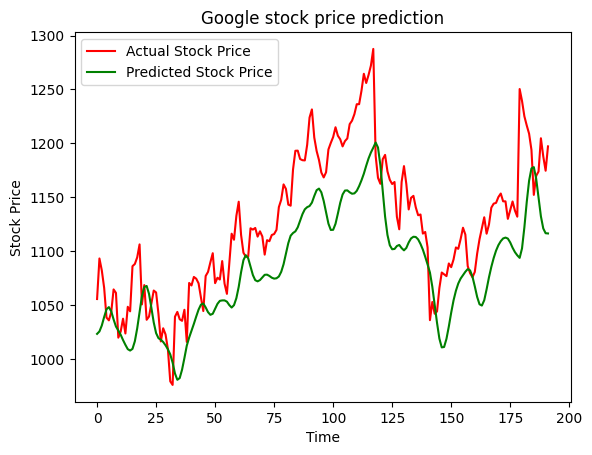

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()